<a href="https://colab.research.google.com/github/LunarByteFlow/Machine-Learning/blob/master/Computer_vision_CNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting started with a whole new section computer vision and Convulutionary neural Networks(CNN)

##Now the First Question that pops Up is **What is Computer Vision Problem?**
* Object Detection (finding something in an image)
* Binary or multiclass classification.

What Apple is Upto in the Field of Machine Learning: https://machinelearning.apple.com/

### What are we going to Cover:
1. Architecture of a CNN with Pytorch.
2. An end to end multiclass Image classification problem.
3. Steps in modeling with CNNs in Pytorch.
  1. Creating a CNN model with Pytorch.
  2. Picking a loss and Optimizer.
  3. Training a Model.
  4. Evaluating a Model.


## 0. Computer Vision Libraries in Pytorch.
* `torchvision` --> base domain library for Torch Computer Vision.
* `torchvision.datasets` --> get datasets and data loading functions for computer vision here.
* `torchvision.models` --> get pretrained computer vision models.
* `torchvision.transformers` --> functions for manipulating your vision data (images) for suitable to be used with an ML model.
* `torch.utils.data.Datasets` --> Functions for manipulating your own vision data. (images).
* `torch.utils.data.DataLoader` --> Creates a ( ) iterateble over the dataset.


In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor


# Visualize,visualize,visualize
import matplotlib.pyplot as plt


# Check the versions
print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


## Getting a Dataset
The dataset we will be using is fashionMNIST from torchvision.datasets.


In [ ]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # where to download data to
    train = True, # do we want the training dataset ,
    download = True, # Do we want to download.
    transform = torchvision.transforms.ToTensor(), # How do we want to transform the data
    target_transform = None # How do we want to transform the labels
)
test_data = datasets.FashionMNIST(
    root = "data", # where to download data to
    train = False, # do we want the training dataset ,
    download = True, # Do we want to download.
    transform = torchvision.transforms.ToTensor(), # How do we want to transform the data
    target_transform = None # How do we want to transform the labels
)
test_data


100%|██████████| 26421880/26421880 [00:11<00:00, 2302262.88it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212920.37it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3951694.16it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14658708.07it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# Find some information about classnames in our training data
class_names = train_data.classes
class_names

# Find the index associated with eash class
class_to_idx = train_data.class_to_idx
class_to_idx

# the labels associated with our training data.
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Extract a single image from the training dataset
image,label = train_data[0]

# check the shape of the image
print(f"The size of the images in our training data is: {image.shape} [color_channel, height, width]")
print(f"The label of this image is: {label}")



The size of the images in our training data is: torch.Size([1, 28, 28]) [color_channel, height, width]
The label of this image is: 9


## 1.2 Visualizing our data.

(-0.5, 27.5, 27.5, -0.5)

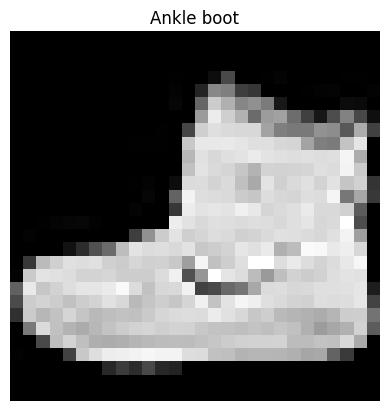

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0]
plt.imshow(image.squeeze(),cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

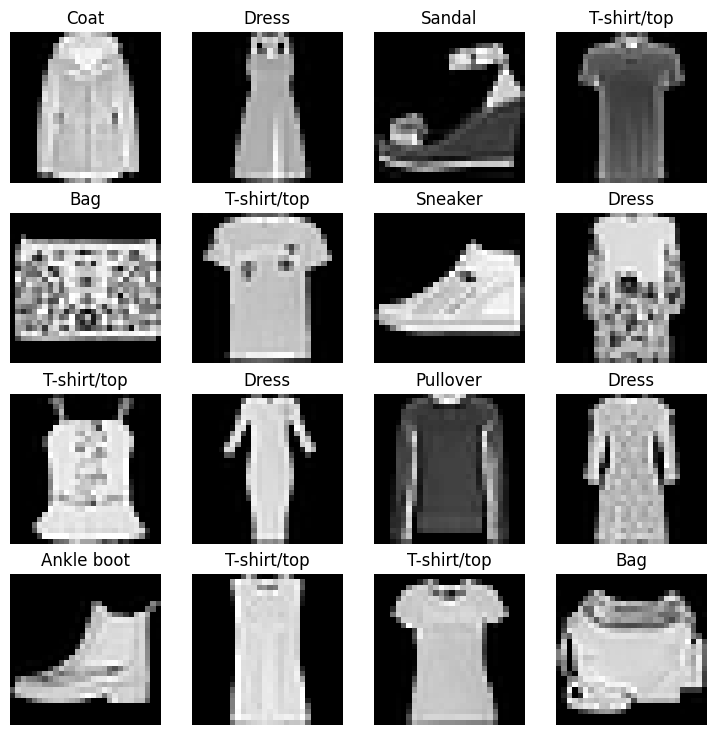

In [ ]:
# pLot more images
# torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size = [1]).item()
  image,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

  ## Do you think these items of clithing (images) could be modeled with pure linear lines ? Or they can be modelled with non-linearity?
  ### 2. Prepare DataLoader

  * Right now our data is in the form of pytorch Datasets
  * A DataLoader Converts our data into a python iteratable
  * More specifically, we want to turn our data into batches (or mini-batches).

  why would we do this?
  1. It is more computationally efficient, as in , your computer hardware may not be able to look (store in memory) at 60,000 images in one hit. so we beak it down to 32 images at a time (batch size).
  2. It gives our neural network more chances to updata its gradients per epoch.


In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e3d2fab0ac0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e3de02ad360>)

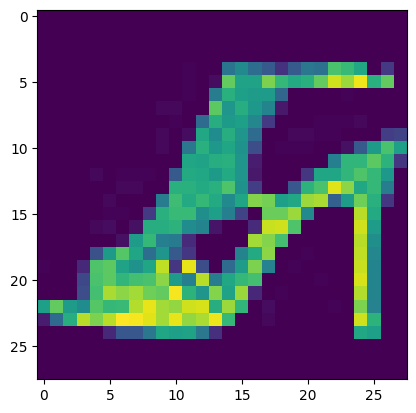

In [ ]:
# Check out what is inside the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape
# The images that are in the batch
plt.imshow(train_features_batch[9].squeeze())

(-0.5, 27.5, 27.5, -0.5)

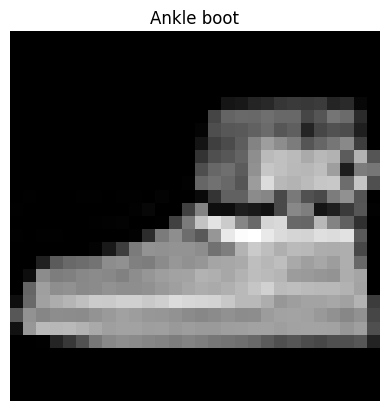

In [ ]:
# this code is setting up a way to randomly select a single image
# from your batch of training images.
# torch.manual_seed(42)
random_idx= torch.randint(0 , len(train_features_batch),(1,))
img , label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

## 3 Model 0 : Build a baseline Model

When starting to build a series of machine learning modelling baseline experiments, its best practice to start with a baseline model.

A baseline model is a simple model you will try and build upon with subsequent models and experiments.

In other words : start simply and add complexity where necessary.

In [ ]:
# Create a flatten layer
flatten_layer = nn.Flatten()

x = train_features_batch[2]
print(f"The shape of the tensor before Flattening {x.shape}")
output = flatten_layer(x)
print(f"The shape of the tensor after flattening : {output.shape}")

The shape of the tensor before Flattening torch.Size([1, 28, 28])
The shape of the tensor after flattening : torch.Size([1, 784])


In [ ]:
# lets build our first model.
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int,hidden_units:int, output_shape:int):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units , out_features = output_shape),
)

  def forward(self,x):
    return self.linear_layer_stack(x
    )

In [ ]:
model_0 = FashionMNISTModelV0(input_shape = 28*28, hidden_units = 10, output_shape = len(class_names))
model_0
model_0.state_dict()

# Create a dummy data
dummy_data = torch.rand([1,1,28,28])
# pass this dummy data trough our model.
model_0(dummy_data)


tensor([[ 0.1849, -0.4599, -0.0896, -0.4446, -0.0008,  0.0125, -0.1091, -0.0993,
          0.1416, -0.1377]], grad_fn=<AddmmBackward0>)

## 3.1 Setup Loss, Optimizer and Evaluation metrics.
* Loss Functions - Since we're working with multiclass data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - Our Optimizer `torch.optim.SGD()` --> Stochastic Gradient Descent.
* Evaluation metric - Since we're working with classification problem, let's use accuracy as our evaluation metric.

In [ ]:
import requests
from pathlib import Path
# Download helper function from learn python repo
if Path('helper_functions.py').is_file():
  print("Helper_functions.py already exist so skipping download")
else:
  print("Downloadig helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)



Downloadig helper_functions.py


In [ ]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
# from helper_functions import accuracy_fn # Not working (I dont know why)
# setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.1)

In [ ]:
logits = model_0(dummy_data)
y_pred_probs = torch.softmax(logits,dim = 1)

y_pred_labels = torch.argmax(y_pred_probs, dim = 1)
print(y_pred_labels)
y_pred_probs,y_pred_labels

tensor([0])


(tensor([[0.1304, 0.0684, 0.0991, 0.0695, 0.1083, 0.1097, 0.0972, 0.0981, 0.1249,
          0.0944]], grad_fn=<SoftmaxBackward0>),
 tensor([0]))

### 3.2 Creating a function to Time our Experiments.
Machine Learning is very experimental

Two of the main things you often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs.

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device = None):
  total_time = start - end
  print(f"Train time on device {device} is {total_time}")
  return total_time


In [ ]:
start = timer()
# code here
end_time = timer()
print_train_time(start,end_time,"CPU")

Train time on device CPU is -6.413900018742424e-05


-6.413900018742424e-05

### 3.3 Creating a traiing Loop and Training our Model on batches of data...
## Highlight that the optimizer will update will update the model's parameters once per batch rather than once per epoch.



### 3.3 Creating a training loop and training a model on batches of data.

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the training loss **per batch**
3. Loop through testing batches, perform testing steps,calculate the testing loss **per batch**.
4. Print our What's happening.
5. Time it all (for fun).

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (set is smaller for the initial steps of training)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}-------")
  # Training = 0
  train_loss = 0
  # Add loop to loop through the training batches
  for batch, (img,label) in enumerate(train_dataloader):
    # Do the forward pass
    y_pred = model_0(train_features_batch)
    # Calculate the loss
    loss = loss_fn(y_pred, train_labels_batch)
    train_loss +=loss
    # Optimizer
    optimizer.zero_grad()
    # Loss backward (back propagation)
    loss.backward()
    # Do the optimizer step
    optimizer.step()
    # Print our what is happening
    if epoch % 400 == 0:
      print(f"Epoch: {epoch} | Loss: {loss}")
      print(f"Looked at {batch*len(img)/len(train_dataloader.dataset)}")

  # Devide total train loss by length  of train Data Loader
  train_loss /= len(train_dataloader)
  print(f"Train Loss: {train_loss}")

  # Testig
  test_loss = 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # forward pass
      test_pred = model_0(X_test)

      # find the test loss (accumulatively)
      test_loss += loss_fn(test_pred,y_test)
      print(f"The accumulative test loss: {test_loss}")
      # test_loss = loss_fn(test_pred, y_test)
      # print(f"Test Loss: {test_loss}")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0-------
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.0
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.0005333333333333334
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.0010666666666666667
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.0016
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.0021333333333333334
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.0026666666666666666
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.0032
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.0037333333333333333
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.004266666666666667
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.0048
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.005333333333333333
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.005866666666666667
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.0064
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.006933333333333333
Epoch: 0 | Loss: 4.258955959812738e-05
Looked at 0.007466666666666667
Ep